# Importing Dependencies
----
------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## Reading the Data

--------
--------------------

In [2]:
deformation_data = pd.read_csv('deformation.csv') 

In [3]:
deformation_data.head()

,Unnamed: 0,X Location (mm),Y Location (mm),Z Location (mm),Total Deformation (mm),B,H,X,P
0,0,150.0,50.0,950.0,0.000077,200.0,300.0,200.0,300.0
1,1,100.0,50.0,950.0,0.000077,200.0,300.0,200.0,300.0
2,2,50.0,50.0,950.0,0.000077,200.0,300.0,200.0,300.0
3,3,150.0,50.0,900.0,0.000073,200.0,300.0,200.0,300.0
4,4,100.0,50.0,900.0,0.000073,200.0,300.0,200.0,300.0


## Gaining Insights
--------
--------

In [4]:
deformation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1066450.0,533224.500000,307857.741627,0.000000e+00,266612.250000,533224.500000,799836.750000,1.066449e+06
X Location (mm),1066450.0,100.000000,67.723576,-2.775600e-14,50.000000,100.000000,150.000000,2.000000e+02
Y Location (mm),1066450.0,187.930752,131.164006,0.000000e+00,75.000000,175.000000,300.000000,5.000000e+02
Z Location (mm),1066450.0,500.000000,299.038639,0.000000e+00,250.000000,500.000000,750.000000,1.000000e+03
Total Deformation (mm),1066450.0,0.000381,0.000809,0.000000e+00,0.000038,0.000121,0.000366,1.297800e-02
B,1066450.0,200.000000,0.000000,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02
H,1066450.0,375.861503,96.598092,2.000000e+02,300.000000,400.000000,450.000000,5.000000e+02
X,1066450.0,600.000000,282.842845,2.000000e+02,400.000000,600.000000,800.000000,1.000000e+03
P,1066450.0,550.000000,287.228267,1.000000e+02,300.000000,550.000000,800.000000,1.000000e+03


## Naming the labels and features
--------
---------------

In [5]:
y = deformation_data['Total Deformation (mm)']
X = deformation_data.drop(['Total Deformation (mm)','Unnamed: 0'], axis=1)

In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X Location (mm),1066450.0,100.000000,67.723576,-2.775600e-14,50.0,100.0,150.0,200.0
Y Location (mm),1066450.0,187.930752,131.164006,0.000000e+00,75.0,175.0,300.0,500.0
Z Location (mm),1066450.0,500.000000,299.038639,0.000000e+00,250.0,500.0,750.0,1000.0
B,1066450.0,200.000000,0.000000,2.000000e+02,200.0,200.0,200.0,200.0
H,1066450.0,375.861503,96.598092,2.000000e+02,300.0,400.0,450.0,500.0
X,1066450.0,600.000000,282.842845,2.000000e+02,400.0,600.0,800.0,1000.0
P,1066450.0,550.000000,287.228267,1.000000e+02,300.0,550.0,800.0,1000.0


In [7]:
y.describe()

count    1.066450e+06
mean     3.814238e-04
std      8.092498e-04
min      0.000000e+00
25%      3.815400e-05
50%      1.213400e-04
75%      3.659200e-04
max      1.297800e-02
Name: Total Deformation (mm), dtype: float64

## Splitting the data into Test and Train Dataset
--------
-----------

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.9, test_size=0.1 ,random_state = 2)

In [9]:
# Checking if the splitting is done accurately
print(np.sum(train_y.index)/len(train_y.index)==np.sum(train_X.index)/len(train_X.index)) 
print(np.sum(test_y.index)/len(test_y.index)==np.sum(test_X.index)/len(test_X.index))

True
True


### Preprocessing the dataset

-----------
-----------
- Using StandardScaler() to standardize the values.

In [10]:
from sklearn.preprocessing import StandardScaler

standard=StandardScaler()

X_trainscaled=standard.fit_transform(train_X)

X_testscaled=standard.transform(test_X)

### Training a Model

----------
-----------



In [11]:
from sklearn.neural_network import MLPRegressor

%%time
reg = MLPRegressor(hidden_layer_sizes=(32,16,16,8),activation="relu" ,random_state=1, max_iter=20000000).fit(X_trainscaled,train_y)

In [12]:
%%time
y_pred=reg.predict(X_testscaled)

Wall time: 361 ms


In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,y_pred)

2.3481517362450086e-08

----------
-------------

## Plotting the Predictions of Stress from Trained Model (2D)
--------
------

- **Description of the dimension of beam**
    - ***Breadth: 200mm***
    - ***Height: 300mm***
    - ***Length: 1000mm***
    
    
- **Load description**
    - ***Load position: $400mm$***
    - ***Load value: $800kN$***


---------
As our problem is 2D, we will be keeping value of one dimension fixed. Here, is is ***X*** is axis.


In [30]:
# Defining the dimensions of a beam, load values and load position.
breadth=200
height=400
load_position=400
load_value=1000

# Creating the 3D- beam
X=[[100]]*31*101
Y=[[y] for y in range(0,310,10)]*101    
Z=[[z]*31 for z in range(0,1010,10)]


# Conversion of list data into numpy array form
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)

# Using ravel, for flattening of multi dimensional array 
X=np.ravel(X)
Y=np.ravel(Y)
Z=np.ravel(Z)


In [31]:
# Generating the input DataFrame for model
df=pd.DataFrame({"X Location (mm)":X,"Y Location (mm)":Y,"Z Location (mm)":Z,"B":breadth,"H":height,"X":load_position,"P":load_value})

### Standardising the Data, to fit values in the model

In [32]:
df=standard.transform(df)
df1 = pd.DataFrame(data=df, columns=train_X.columns)

### Generating the deformation values for a given beam

In [33]:
df1['Total Deformation (mm)']=reg.predict(df1)

### Reversing the Standardised data

In [34]:
df2=standard.inverse_transform(df1[df1.columns[:-1]])

df2 = pd.DataFrame(data=df2, columns=train_X.columns)

df2['Total Deformation (mm)']=df1['Total Deformation (mm)']

----------------------
# Plotting the results

---------
- For plotting the results for 2D beam, we need to drop X dimension here.

In [35]:
df2.drop('X Location (mm)',axis=1,inplace=True)

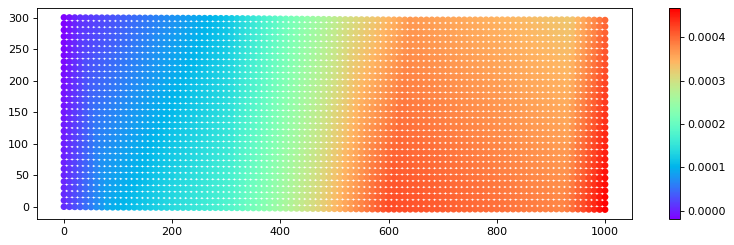

In [36]:
import matplotlib as mpl
zlist=np.linspace(0,1000,101)
ylist=np.linspace(0,300,31)
Y, Z = np.meshgrid(ylist, zlist)
C=np.reshape(df2['Total Deformation (mm)'].values,(101,31))      # For 2D problem, keep check on dimension(101,31)


cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
plt.figure(figsize=(12, 3.5), dpi=80)
points = plt.scatter(Z,Y-C*10000,c=C,cmap='rainbow',lw=0)

plt.colorbar(points)
plt.show()
